# Problem Statement

#### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style('Darkgrid')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data1 = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]  #defining the columns
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
data1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
data1.shape

(1436, 9)

In [7]:
data1.rename(columns={'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},inplace=True)

In [8]:
data1[data1.duplicated()].shape # duplicates are present

(1, 9)

In [9]:
data1=data1.drop_duplicates().reset_index(drop=True)
data1[data1.duplicated()]      # No duplicated values present

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [10]:
data1[data1.values==0.0]    # No null values

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [11]:
data1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [12]:
data1.info()    # no categorical data .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


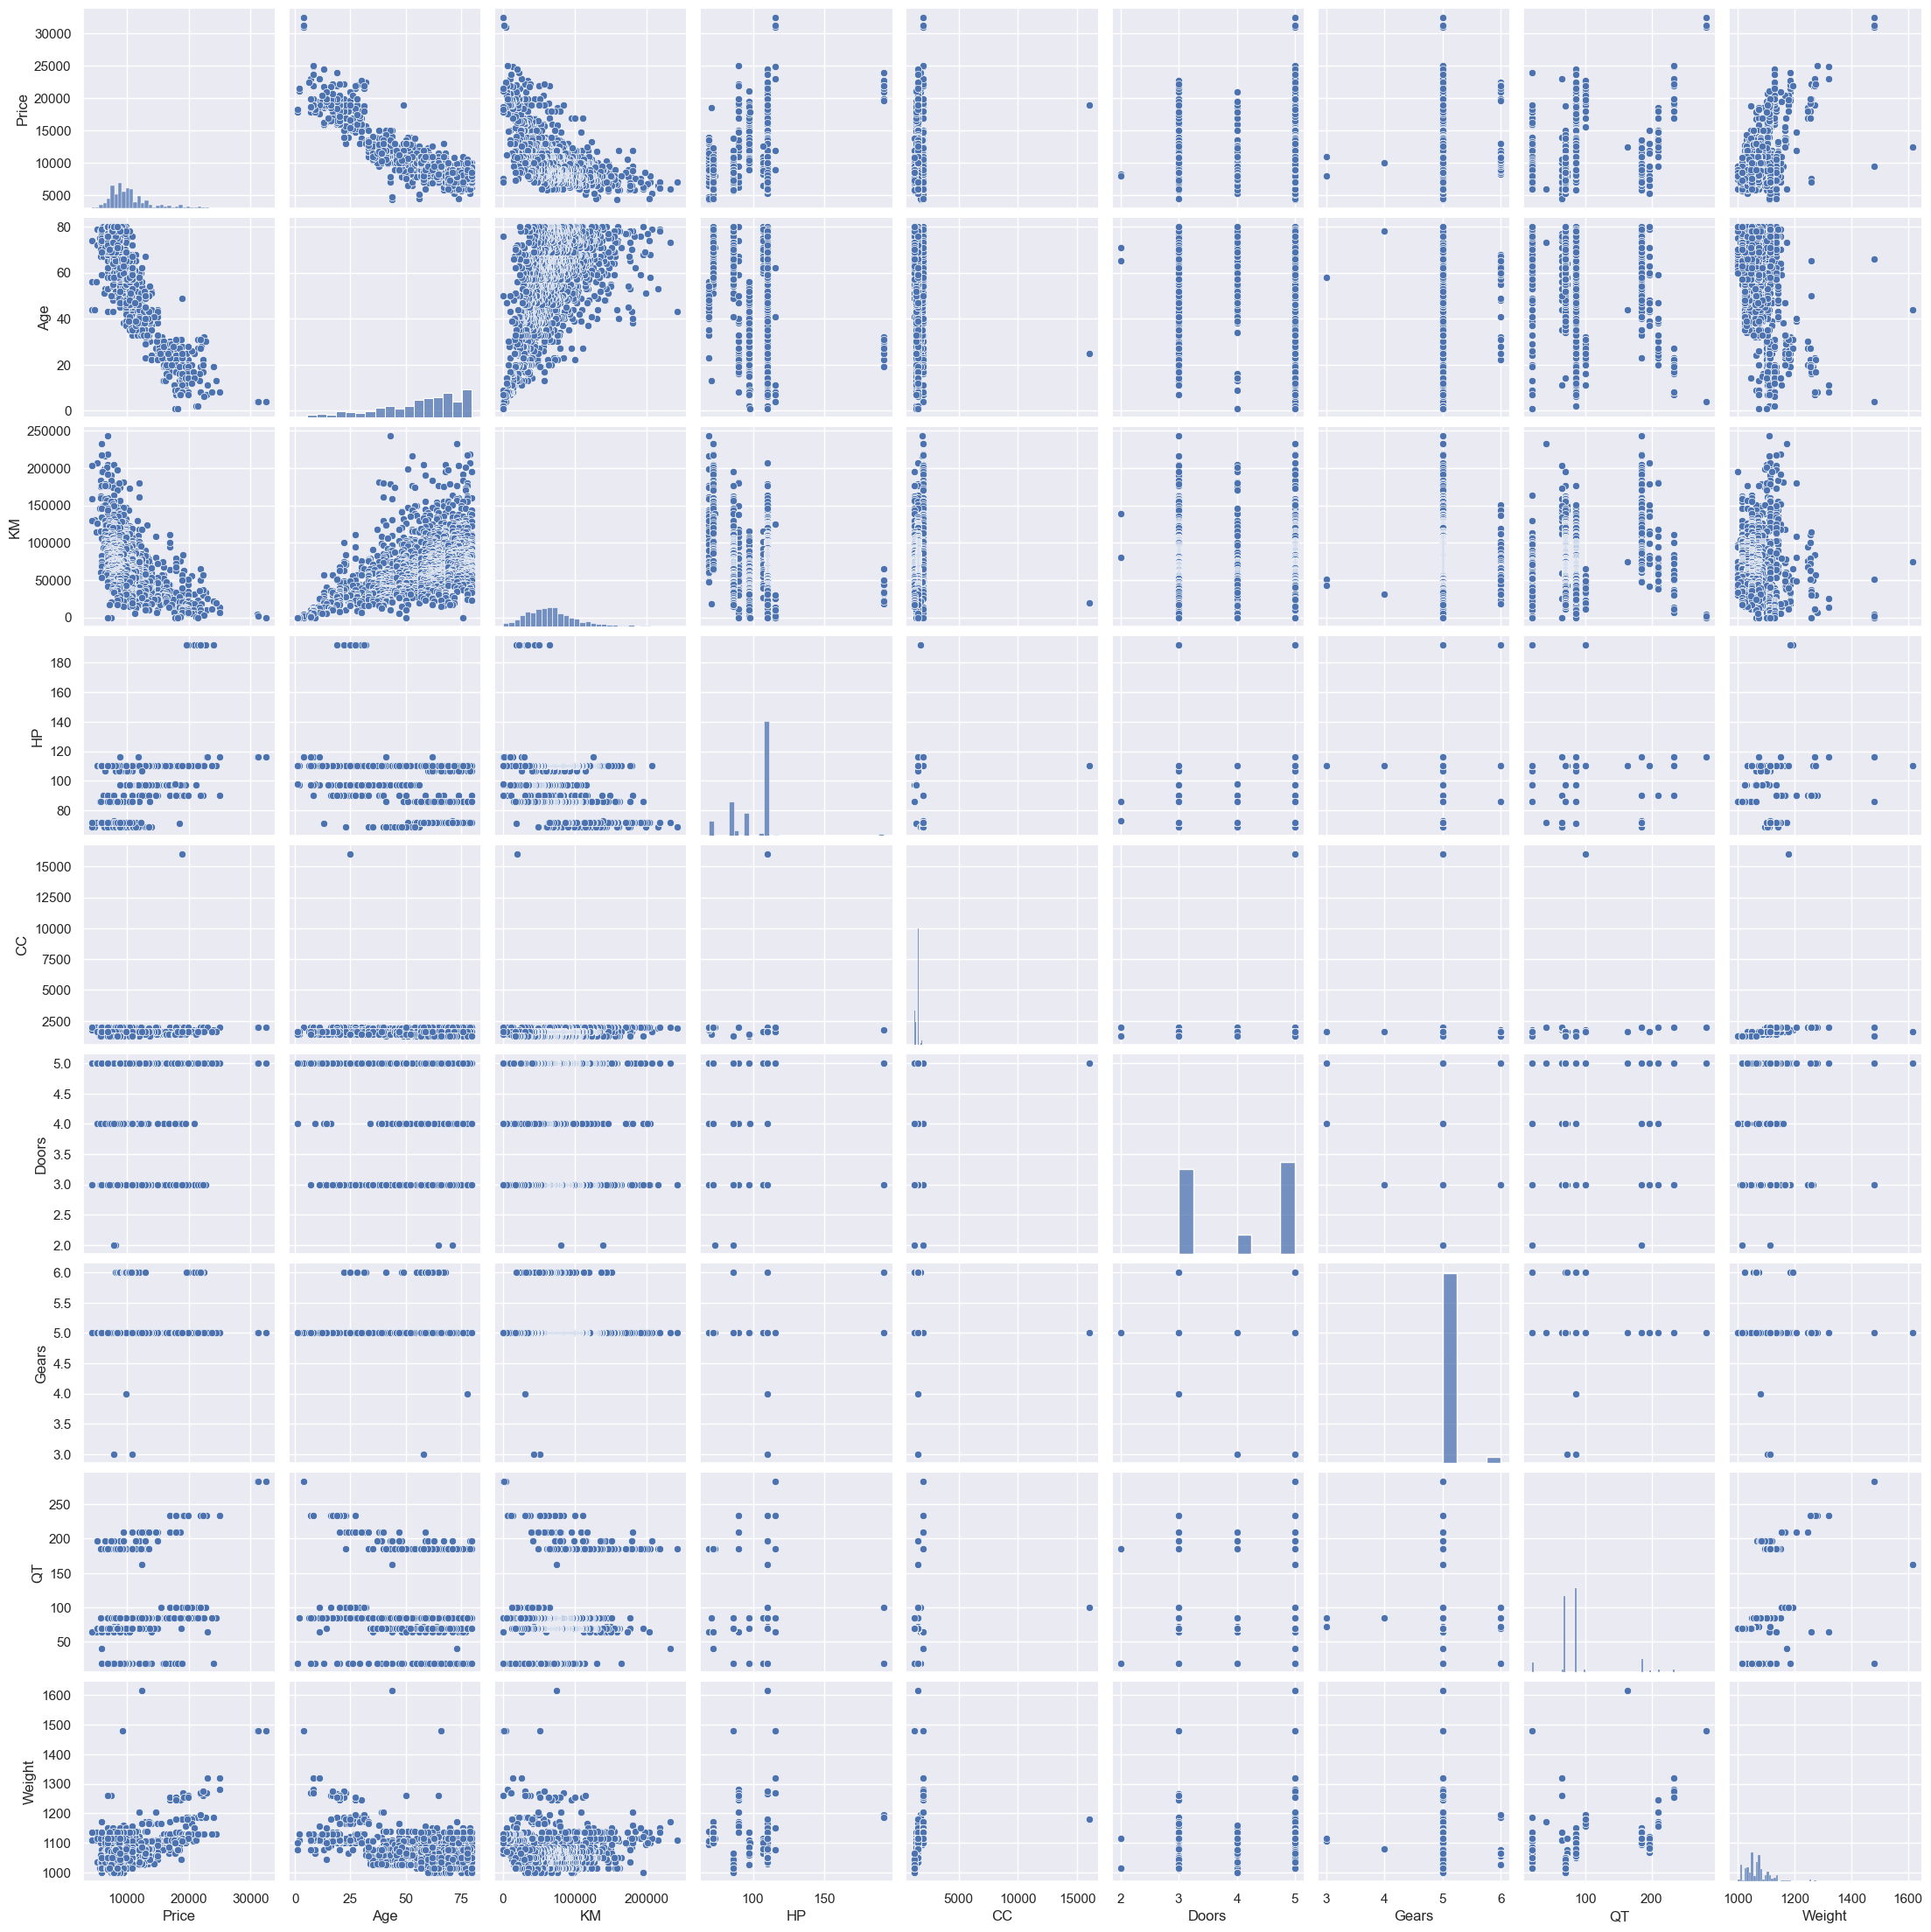

In [13]:
sns.pairplot(data1)

<Axes: >

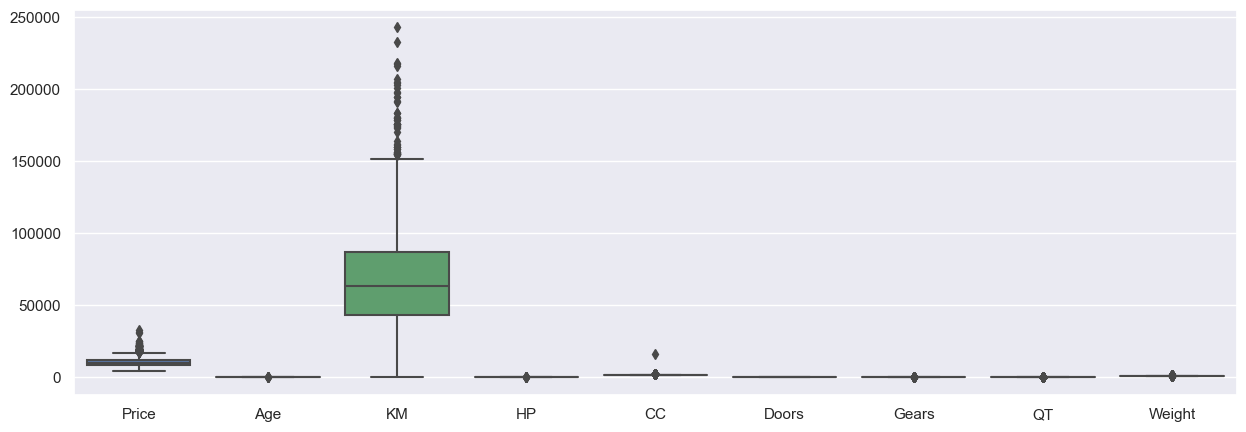

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data1)          # outliers are there

In [15]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)

IQR=Q3 - Q1

var1= Q1-1.5*IQR
var2=Q3+ 1.5*IQR


data2=data1[~((data1<var1)|(data1>var2)).any(axis=1)]

In [16]:
data2.shape    # 368 entries removed

(1068, 9)

<Axes: >

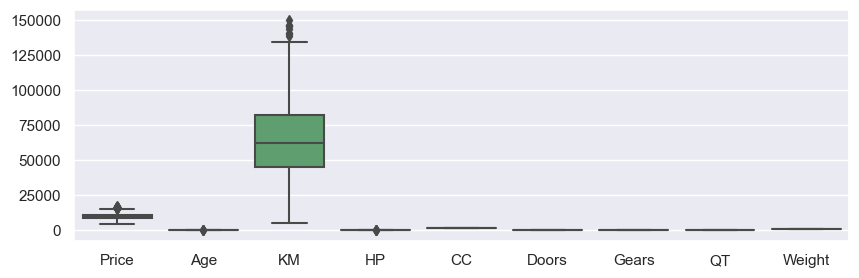

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(data=data2)

In [18]:
data2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.864899,-0.542729,0.150470,0.083813,0.172822,NaN,0.404433,0.496719
Age,-0.864899,1.000000,0.488156,-0.057575,-0.022686,-0.097605,NaN,-0.272505,-0.365319
KM,-0.542729,0.488156,1.000000,0.017745,0.101174,0.012241,NaN,-0.110129,-0.086172
HP,0.150470,-0.057575,0.017745,1.000000,0.907076,0.185710,NaN,0.442250,0.507455
CC,0.083813,-0.022686,0.101174,0.907076,1.000000,0.202208,NaN,0.385398,0.556533
Doors,0.172822,-0.097605,0.012241,0.185710,0.202208,1.000000,NaN,0.623416,0.546448
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT,0.404433,-0.272505,-0.110129,0.442250,0.385398,0.623416,NaN,1.000000,0.800215
Weight,0.496719,-0.365319,-0.086172,0.507455,0.556533,0.546448,NaN,0.800215,1.000000


In [19]:
data2 = data2.drop_duplicates()
data2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
22,15950,28,56349,110,1600,3,5,85,1120
23,16950,28,32220,110,1600,3,5,85,1120
24,16250,29,25813,110,1600,3,5,85,1120


In [20]:
data2[data2.duplicated()]   # No duplicated values.

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


<Axes: >

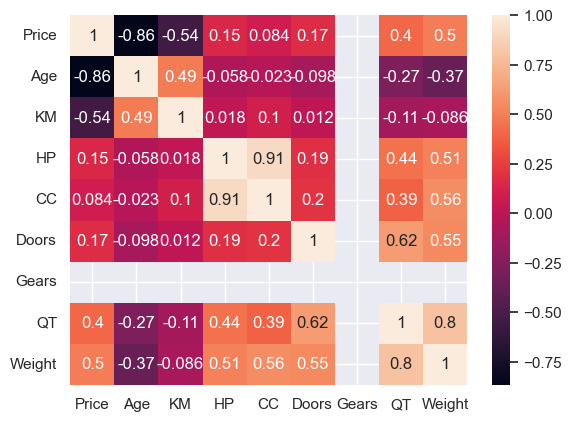

In [21]:
sns.heatmap(data2.corr(),annot=True)

### Model Building

In [22]:
model_unscaled=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=data2).fit()
model_unscaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     701.5
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:59:26   Log-Likelihood:                -8853.4
No. Observations:                1068   AIC:                         1.772e+04
Df Residuals:                    1060   BIC:                         1.776e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -319.5307     76.343     -4.185      0.000    -469.331    -169.730
Age         -101.3559      2.471    -41.013      0.000    -106.205     -96.507
KM            -0.0140      0.001    -10.913      0.000      -0.017      -0.011
HP            47.6991      7.639      6.244      0.000      32.710      62.689
CC            -4.6695      0.630     -7.418      0.000      -5.905      -3.434
Doors        -89.9535     41.240     -2.181      0.029    -170.875      -9.032
Gears      -1597.6534    381.715     -4.185      0.000   -2346.656    -848.651
QT            -2.4126      7.215     -0.334      0.738     -16.569      11.744
Weight        26.4782      2.368     11.182      0.000      21.832      31.124
==============================================================================
Omnibus:                       12.696   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.205
Skew:                           0.009   Prob(JB):                     4.10e-05
Kurtosis:                       3.674   Cond. No.                     2.50e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
from sklearn.preprocessing import StandardScaler

col=data2.columns
features=data2[col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_scaled=pd.DataFrame(features,columns=col)
data_scaled.head()




,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,3.030007,-1.926645,-0.021001,0.70009,0.691313,-1.082145,0.0,1.033294,1.906361
1,2.592785,-1.926645,0.100996,0.70009,0.691313,-1.082145,0.0,1.033294,1.906361
2,2.592785,-2.058365,-0.317032,0.70009,0.691313,-1.082145,0.0,1.033294,2.477788
3,3.030007,-2.058365,-1.208782,0.70009,0.691313,-1.082145,0.0,1.033294,2.477788
4,2.723952,-1.992505,-1.445570,0.70009,0.691313,-1.082145,0.0,1.033294,2.477788


In [24]:
data_scaled[data_scaled.values==0].shape     # after scaling all values of Gear has become null hence we will drop this coulmn

(1068, 9)

<Axes: xlabel='Gears', ylabel='count'>

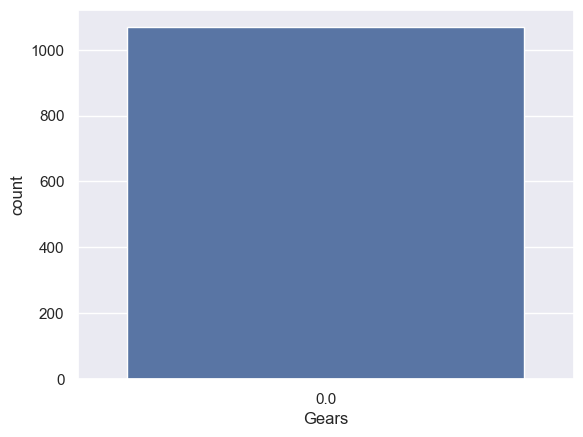

In [25]:
sns.countplot(data_scaled,x='Gears')   


In [26]:
data_scaled=data_scaled.drop('Gears',axis=1)

In [27]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight",data=data_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     701.5
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:59:27   Log-Likelihood:                -592.35
No. Observations:                1068   AIC:                             1201.
Df Residuals:                    1060   BIC:                             1240.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.377e-16      0.013   1.84e-14      1.000      -0.025       0.025
Age           -0.6729      0.016    -41.013      0.000      -0.705      -0.641
KM            -0.1656      0.015    -10.913      0.000      -0.195      -0.136
HP             0.2108      0.034      6.244      0.000       0.145       0.277
CC            -0.2643      0.036     -7.418      0.000      -0.334      -0.194
Doors         -0.0373      0.017     -2.181      0.029      -0.071      -0.004
QT            -0.0085      0.025     -0.334      0.738      -0.058       0.041
Weight         0.3039      0.027     11.182      0.000       0.251       0.357
==============================================================================
Omnibus:                       12.696   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.205
Skew:                           0.009   Prob(JB):                     4.10e-05
Kurtosis:                       3.674   Cond. No.                         7.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate Variance Inflation Factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


df=data_scaled.drop(['Price'],axis=1)
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=True)
vif

,Features,VIF
1,KM,1.37
0,Age,1.61
4,Doors,1.75
5,QT,3.82
6,Weight,4.41
2,HP,6.81
3,CC,7.58


### Test for Normality of residuals

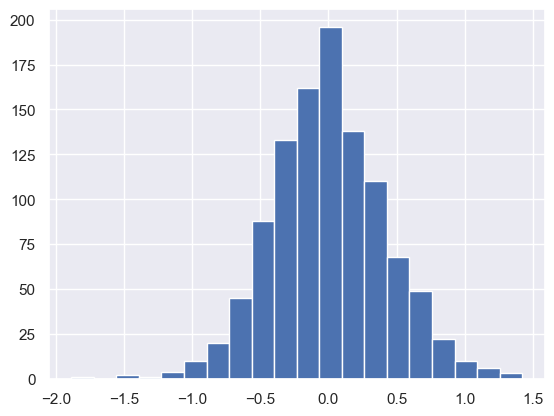

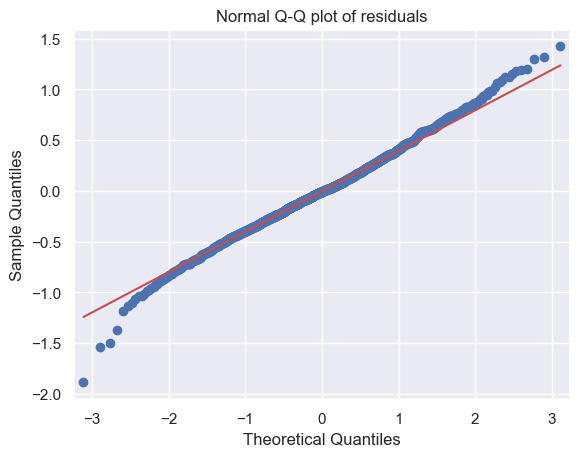

In [29]:
import statsmodels.api as sm
plt.hist(model.resid,bins = 20)
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual plot for homoscedasticity

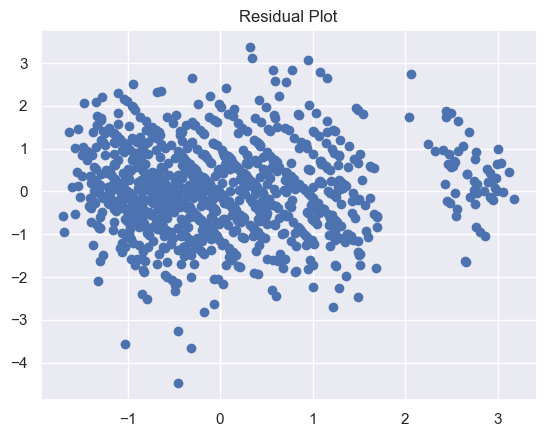

In [30]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

### Residual VS Regressors

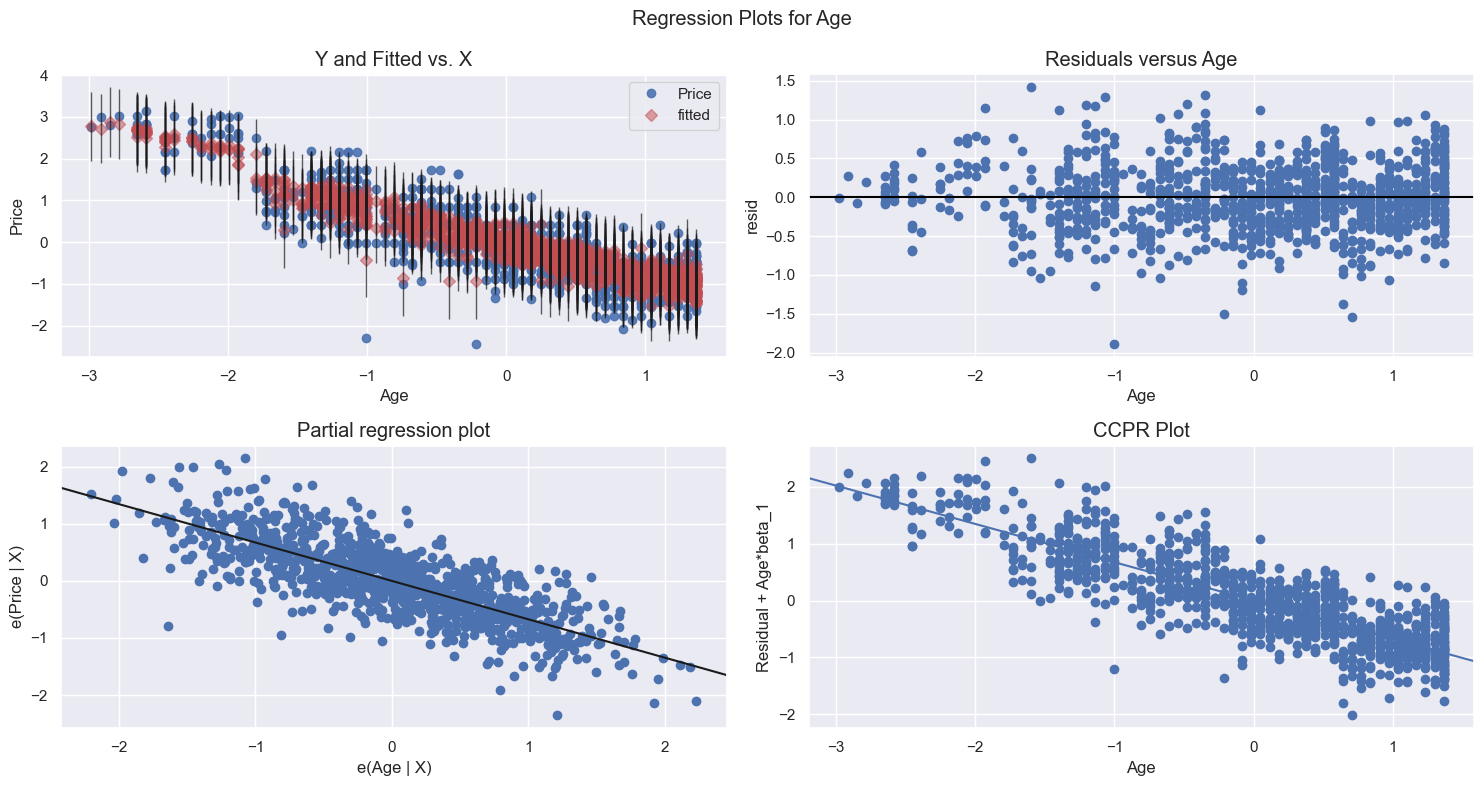

In [31]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

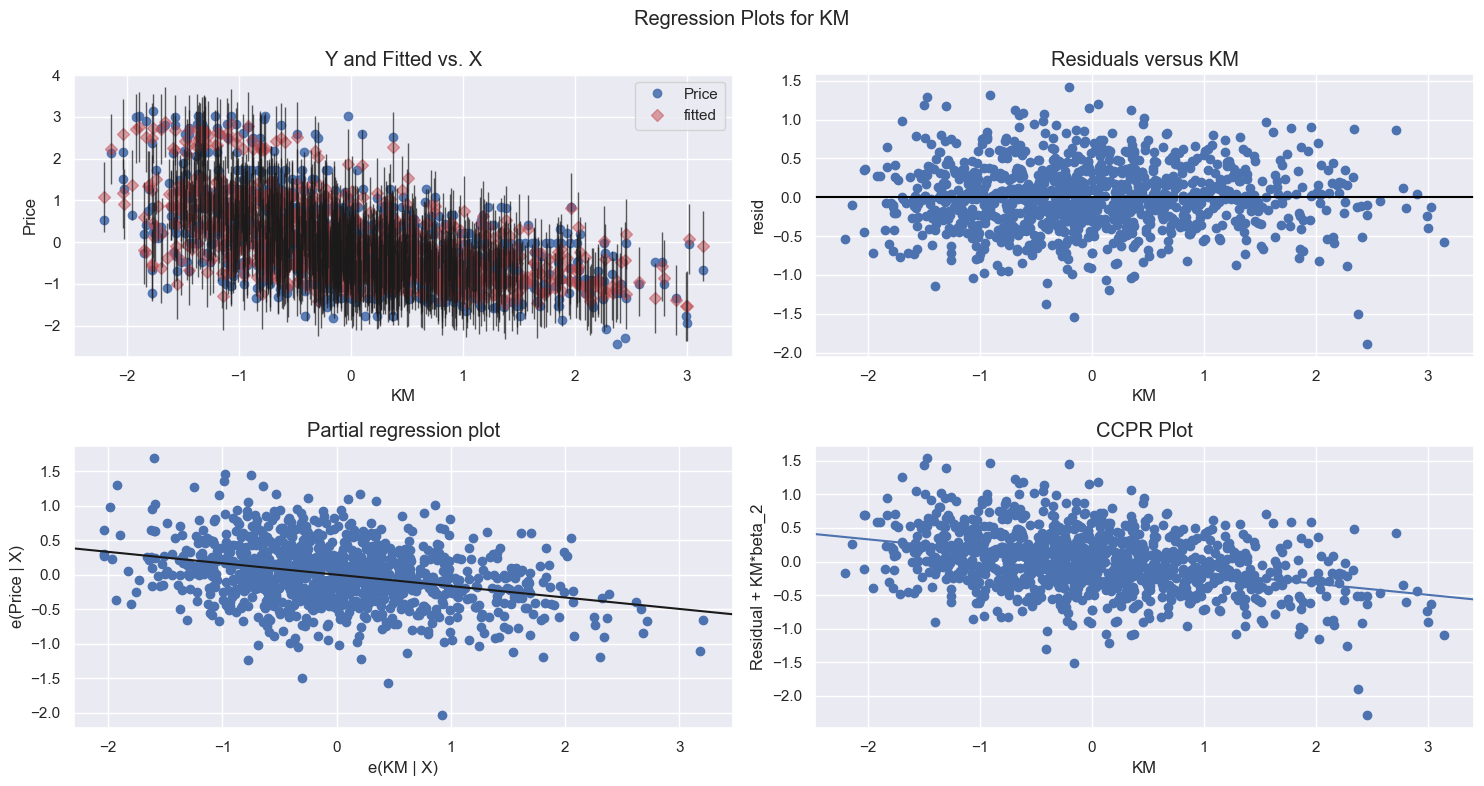

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

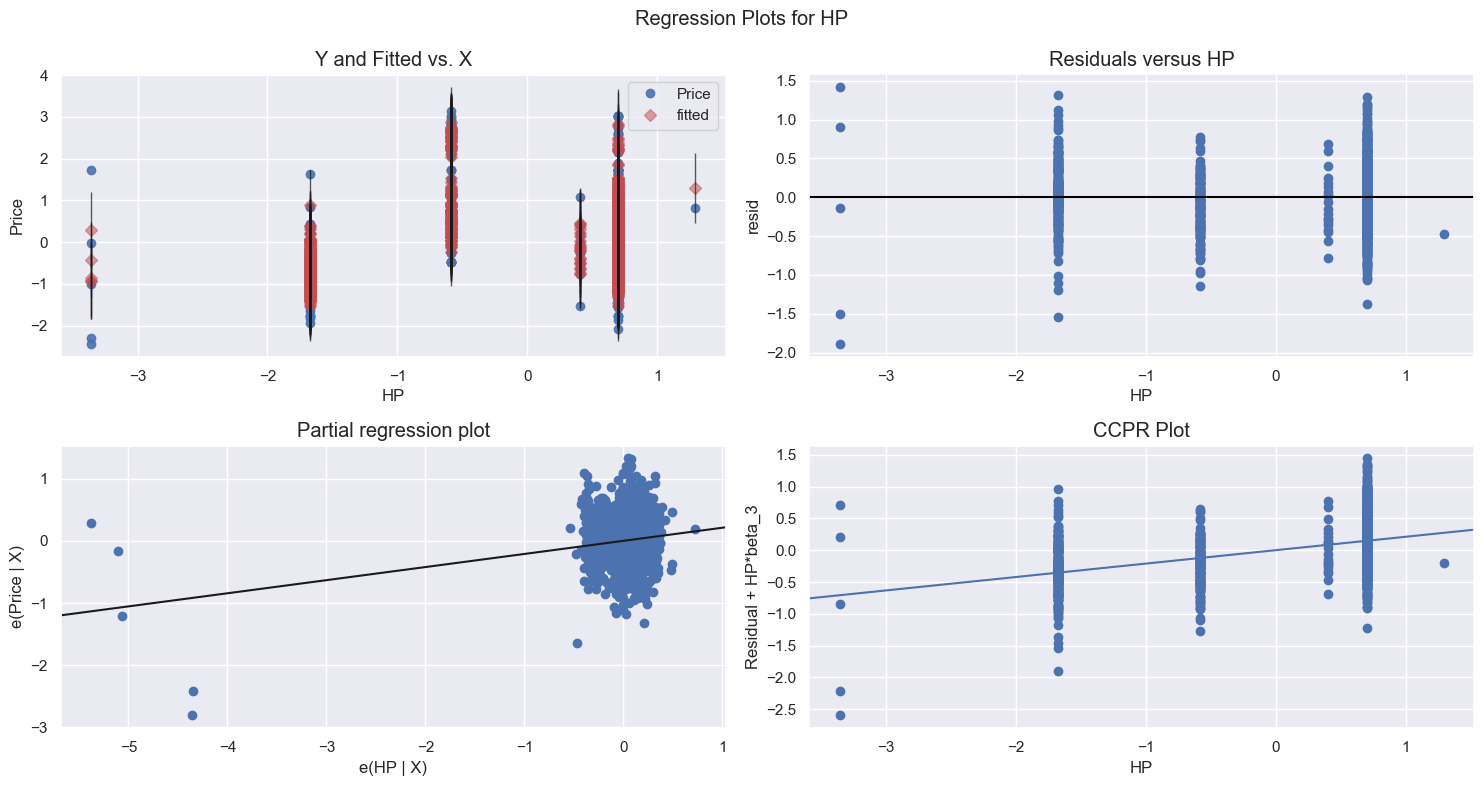

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

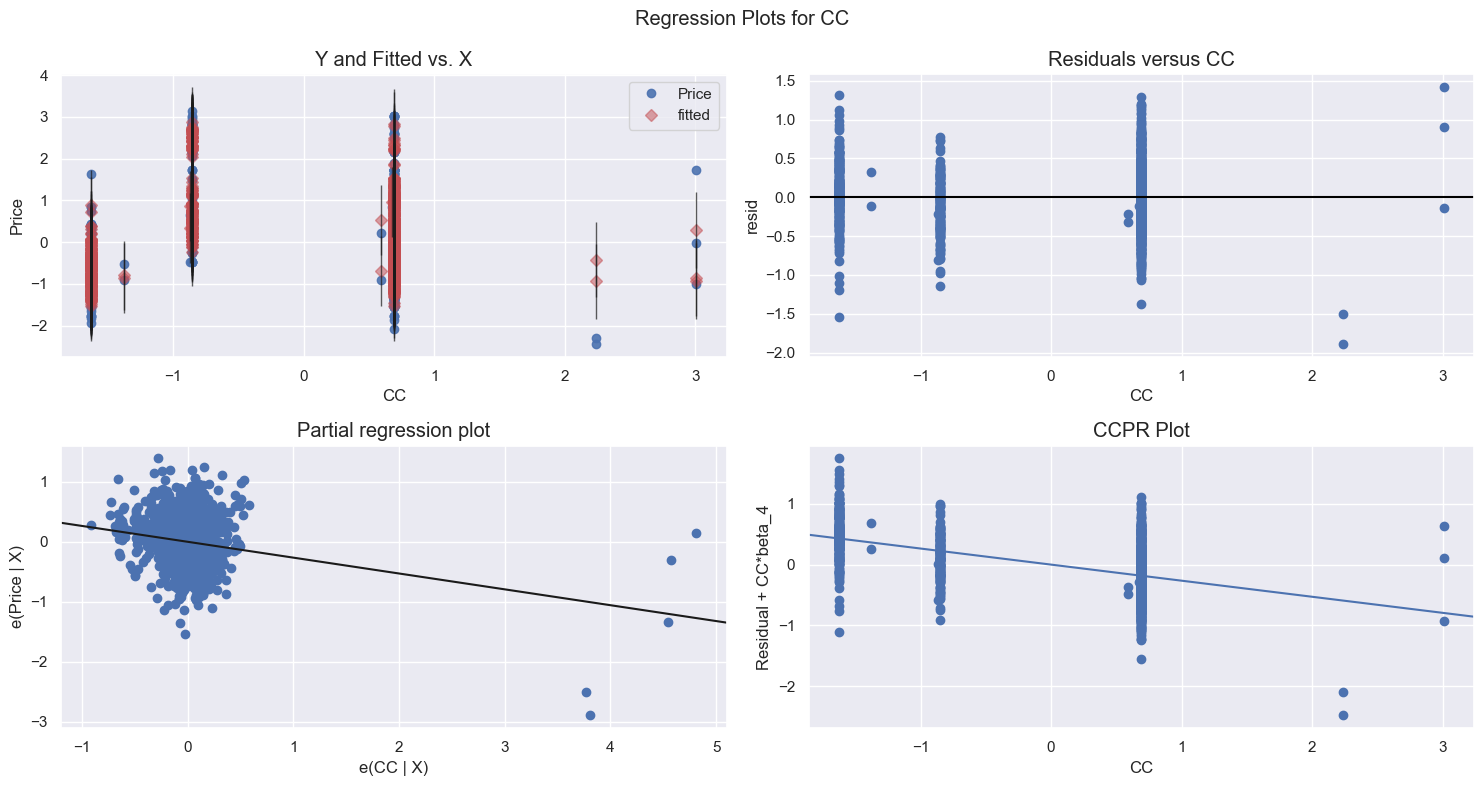

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"CC",fig=fig)
plt.show()

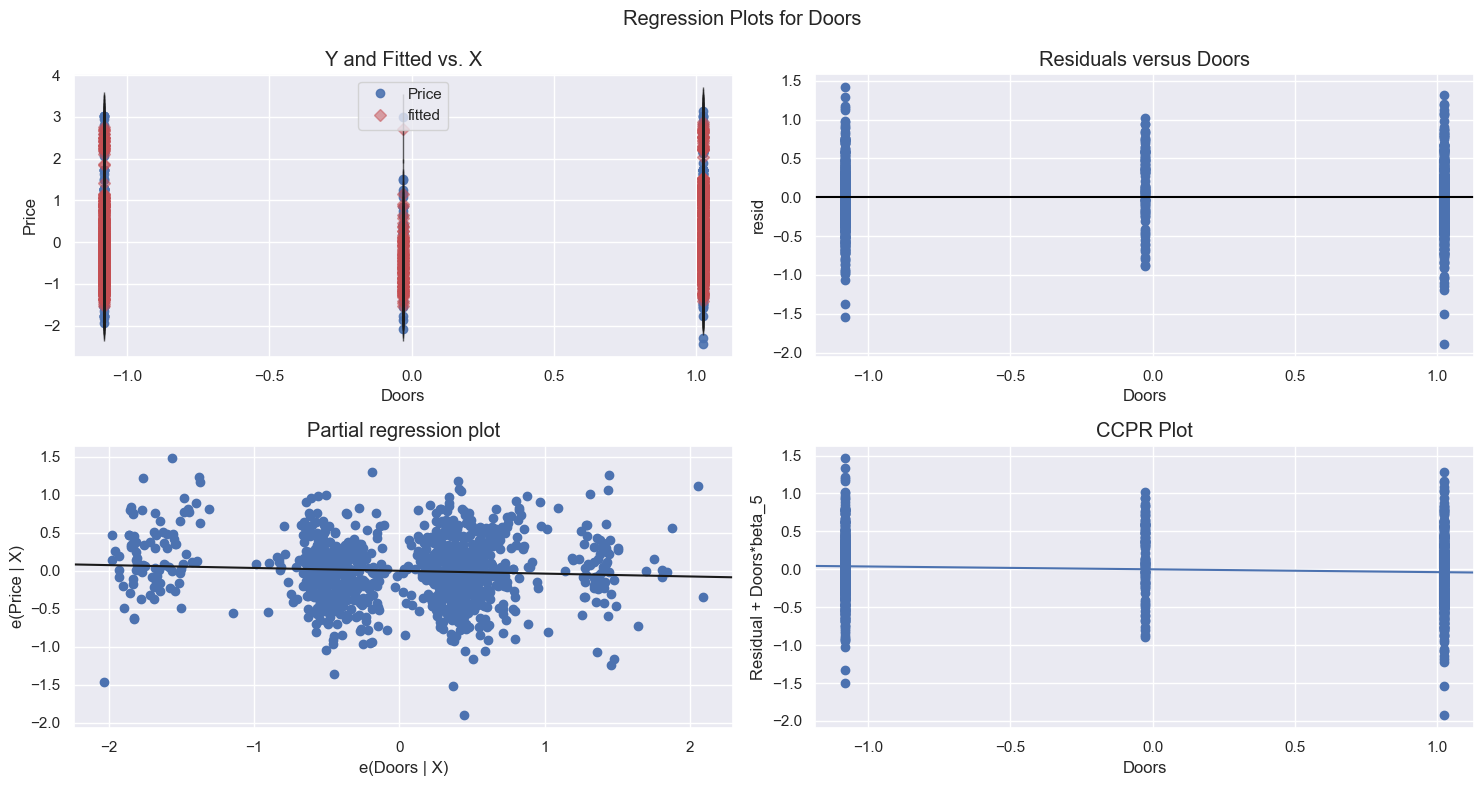

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

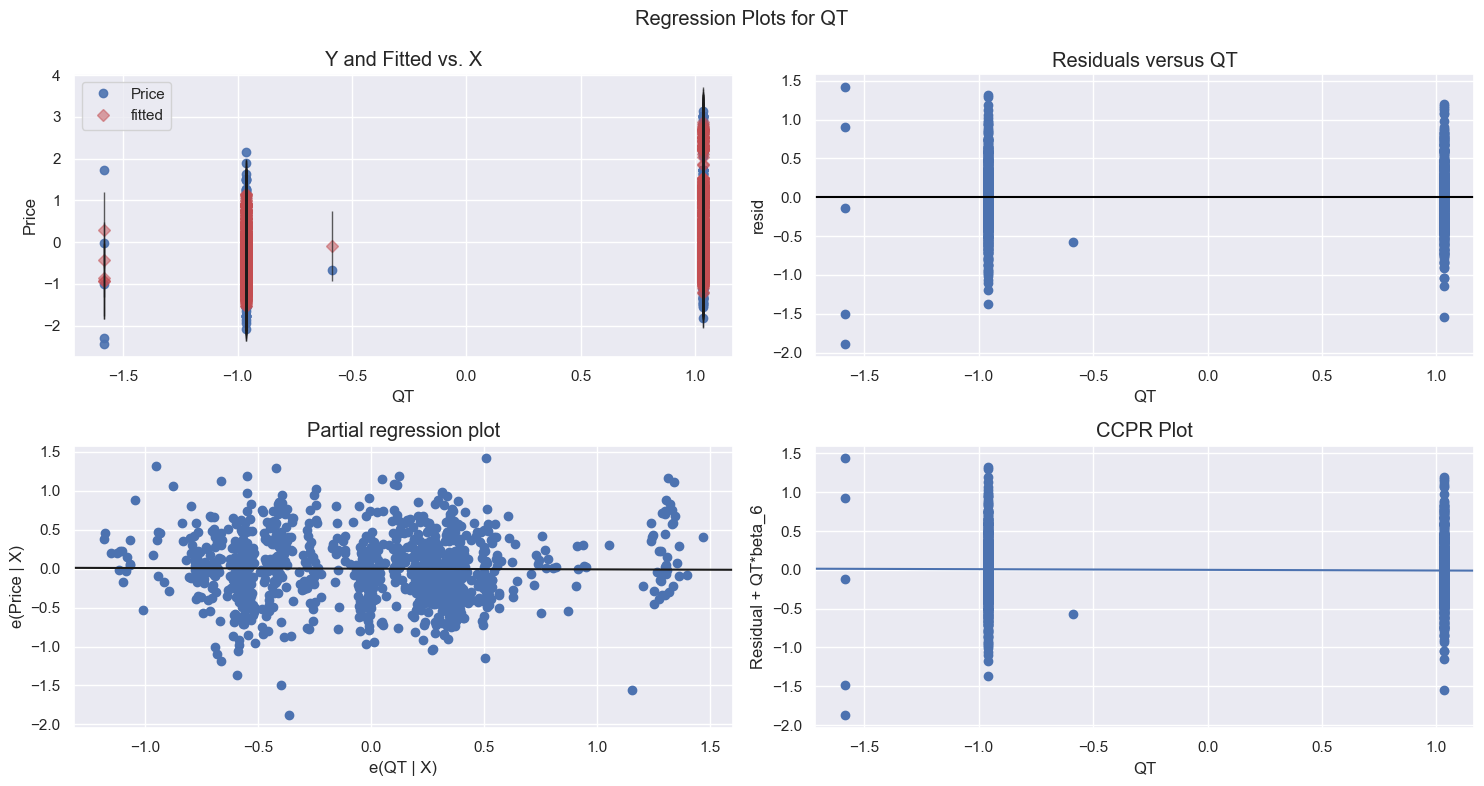

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

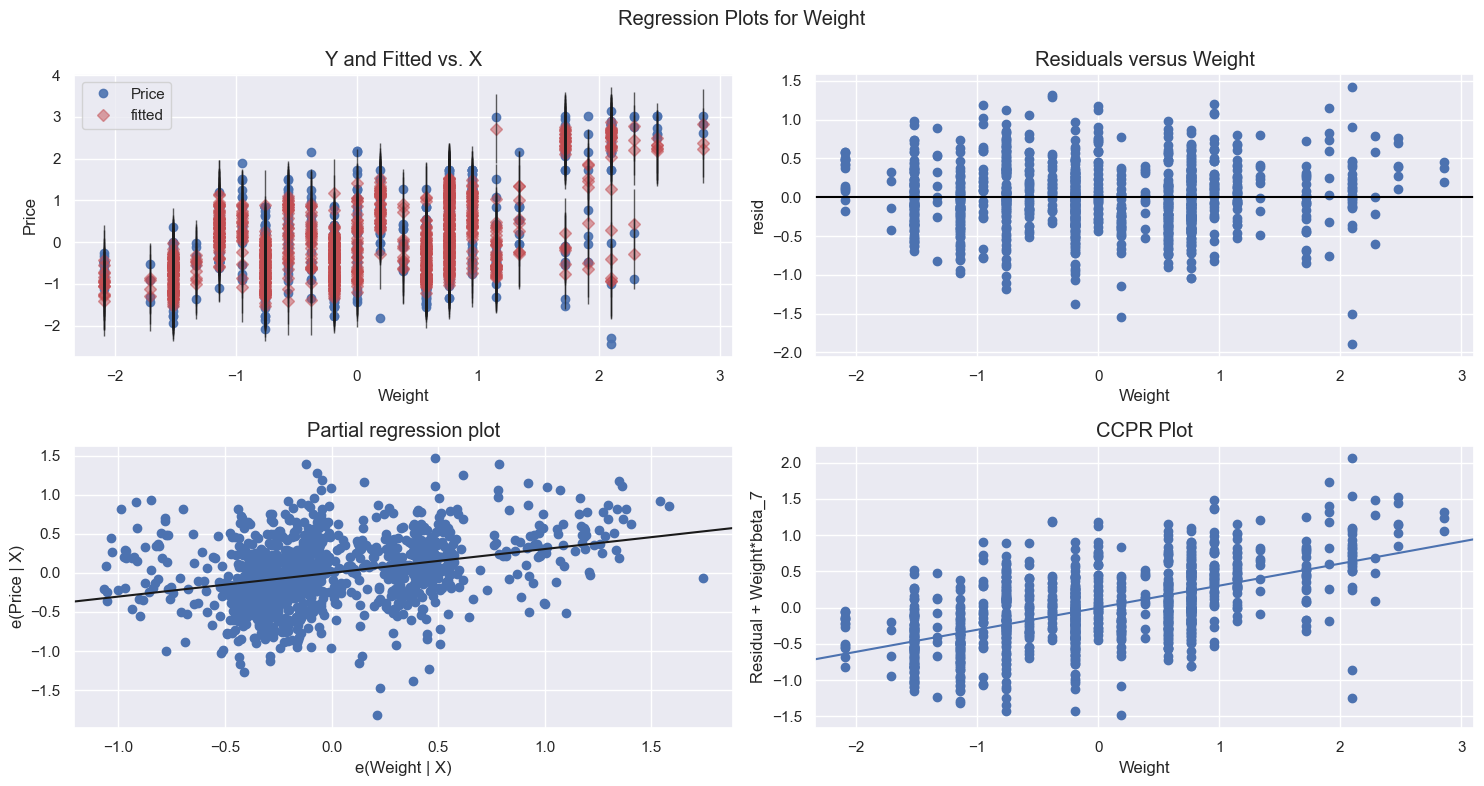

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

### Cook's Distance

In [38]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k = 8
n = 1436
3*(k+1)/n

0.018802228412256268

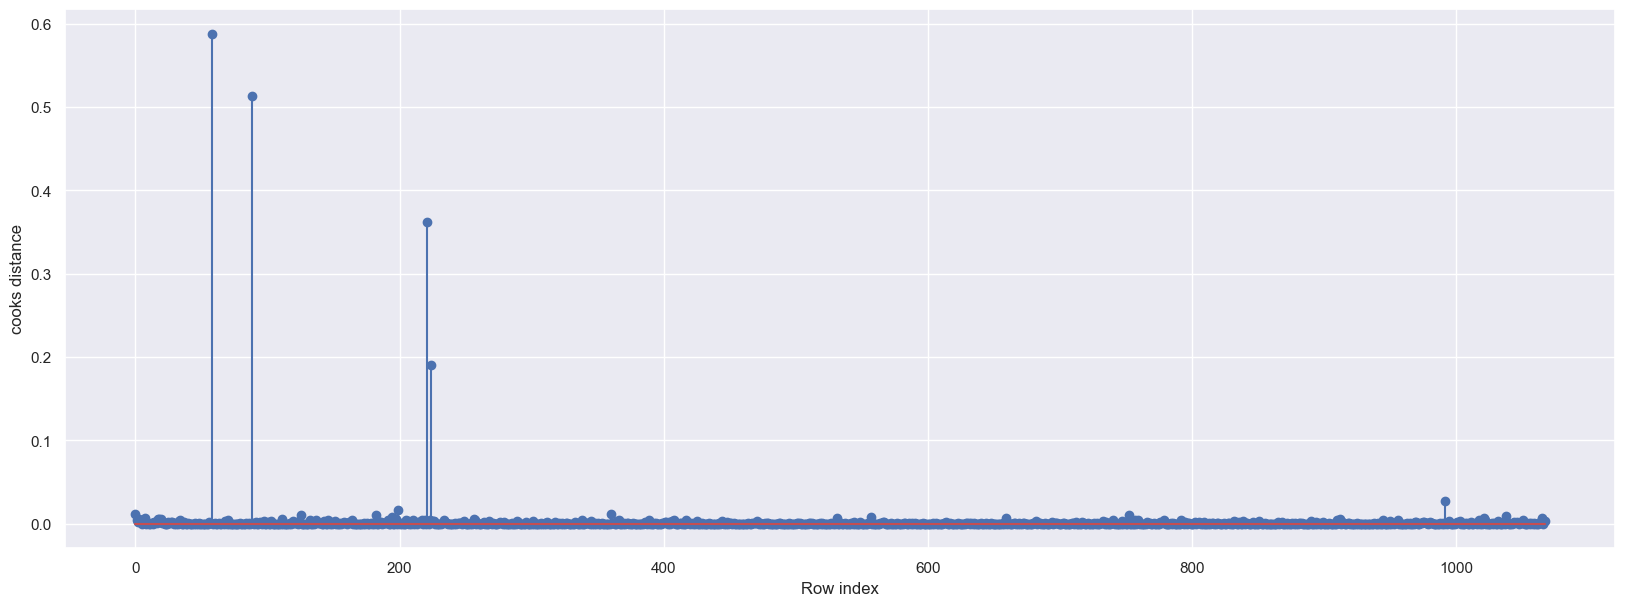

In [39]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data_scaled)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [40]:
np.where(c>0.018)

(array([ 58,  88, 221, 224, 992], dtype=int64),)

In [41]:
data_scaled = data_scaled.drop(data_scaled.index[[58,88,221,224,992]],axis = 0).reset_index()

In [42]:
data_scaled.head()

,index,Price,Age,KM,HP,CC,Doors,QT,Weight
0,0,3.030007,-1.926645,-0.021001,0.70009,0.691313,-1.082145,1.033294,1.906361
1,1,2.592785,-1.926645,0.100996,0.70009,0.691313,-1.082145,1.033294,1.906361
2,2,2.592785,-2.058365,-0.317032,0.70009,0.691313,-1.082145,1.033294,2.477788
3,3,3.030007,-2.058365,-1.208782,0.70009,0.691313,-1.082145,1.033294,2.477788
4,4,2.723952,-1.992505,-1.445570,0.70009,0.691313,-1.082145,1.033294,2.477788


In [43]:
data_scaled=data_scaled.drop(['index'],axis=1)

In [44]:
final_model=smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight",data=data_scaled).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     738.0
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:59:41   Log-Likelihood:                -558.94
No. Observations:                1063   AIC:                             1134.
Df Residuals:                    1055   BIC:                             1174.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0043      0.013      0.341      0.733      -0.021       0.029
Age           -0.6762      0.016    -41.741      0.000      -0.708      -0.644
KM            -0.1603      0.015    -10.848      0.000      -0.189      -0.131
HP             0.1289      0.060      2.163      0.031       0.012       0.246
CC            -0.1911      0.060     -3.187      0.001      -0.309      -0.073
Doors         -0.0375      0.017     -2.242      0.025      -0.070      -0.005
QT            -0.0095      0.025     -0.387      0.699      -0.058       0.039
Weight         0.3112      0.026     11.778      0.000       0.259       0.363
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.703
Skew:                           0.135   Prob(JB):                       0.0952
Kurtosis:                       3.183   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
final_model.rsquared,final_model.aic

(0.8304102445343441, 1133.882960328594)

In [46]:
final_model.predict(data_scaled)

0       1.892676
1       1.873120
2       2.207033
3       2.349984
4       2.343407
          ...   
1058   -1.000205
1059   -0.377208
1060   -0.620221
1061   -0.563932
1062   -0.518803
Length: 1063, dtype: float64

In [47]:
predicted=pd.DataFrame()
predicted['Age']=data_scaled.Age
predicted['KM']=data_scaled.KM
predicted['HP']=data_scaled.HP
predicted['CC']=data_scaled.CC
predicted['Doors']=data_scaled.Doors
predicted['QT']=data_scaled.QT
predicted['Weight']=data_scaled.Weight
predicted['Profit']=data_scaled.Price

In [48]:
predicted['Predicted_Profit']=pd.DataFrame(final_model.predict())

In [49]:
predicted[predicted.values==0.0]
predicted=predicted.drop(593).reset_index()

In [50]:
predicted

,index,Age,KM,HP,CC,Doors,QT,Weight,Profit,Predicted_Profit
0,0,-1.926645,-0.021001,0.700090,0.691313,-1.082145,1.033294,1.906361,3.030007,1.892676
1,1,-1.926645,0.100996,0.700090,0.691313,-1.082145,1.033294,1.906361,2.592785,1.873120
2,2,-2.058365,-0.317032,0.700090,0.691313,-1.082145,1.033294,2.477788,2.592785,2.207033
3,3,-2.058365,-1.208782,0.700090,0.691313,-1.082145,1.033294,2.477788,3.030007,2.349984
4,4,-1.992505,-1.445570,0.700090,0.691313,-1.082145,1.033294,2.477788,2.723952,2.343407
...,...,...,...,...,...,...,...,...,...,...
1057,1058,1.366344,-1.549532,-1.673862,-1.626374,-1.082145,-0.960938,-1.522200,-0.686378,-1.000205
1058,1059,0.641886,-1.640300,-1.673862,-1.626374,-1.082145,-0.960938,-1.141249,-1.101739,-0.377208
1059,1060,0.839465,-1.697362,-1.673862,-1.626374,-1.082145,-0.960938,-1.522200,0.360768,-0.620221
1060,1061,0.773606,-1.770686,-1.673862,-1.626374,-1.082145,-0.960938,-1.522200,-0.664517,-0.563932


In [51]:
# col_names = dataframe.columns
# features = dataframe[col_names]

# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)
# df_standard_scaled = pd.DataFrame(features, columns = col_names)
# df_standard_scaled.head()
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# y = df_standard_scaled.drop(['Price'], axis=1)
# vif = pd.DataFrame()
# vif['Features'] = y.columns
# vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [52]:
# rqs_Gears = smf.ols("Gears~Age+KM+CC+Doors+QT+Weight",data=data2).fit().rsquared
# vif_Gears = 1/(1-rqs_Gears)
# vif_Gears

In [53]:


# col=["Age","KM","HP","CC","Doors","QT","Weight"]
# fig = plt.figure(figsize=(20,8))
# #vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
# for i in range(len(col)):
#     sm.graphics.plot_regress_exog(model,col[i],fig=fig)
    

# #sm.graphics.plot_regress_exog(model,,fig=fig)
# plt.show()